Importar librerias

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Eliminar warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

Cargar dataset

In [3]:
JST_df = pd.read_excel('JSTdatasetR4.xlsx', sheet_name = "Data")

In [4]:
JST_df.columns

Index(['year', 'country', 'iso', 'ifs', 'pop', 'rgdpmad', 'rgdppc', 'rconpc',
       'gdp', 'iy', 'cpi', 'ca', 'imports', 'exports', 'narrowm', 'money',
       'stir', 'ltrate', 'debtgdp', 'revenue', 'expenditure', 'xrusd', 'peg',
       'peg_strict', 'crisisJST', 'tloans', 'tmort', 'thh', 'tbus', 'hpnom',
       'peg_type', 'peg_base', 'eq_tr', 'housing_tr', 'bond_tr', 'bill_rate',
       'rent_ipolated', 'housing_capgain_ipolated', 'housing_capgain',
       'housing_rent_rtn', 'housing_rent_yd', 'eq_capgain', 'eq_dp',
       'eq_capgain_interp', 'eq_tr_interp', 'eq_dp_interp', 'bond_rate',
       'eq_div_rtn', 'capital_tr', 'risky_tr', 'safe_tr'],
      dtype='object')

Precrisis

In [5]:
def añadir_precrisis(df):
    df["precrisis"] = 0
    
    for i in range(1,df.shape[0]):
        if (df.loc[i, "crisisJST"] == 1):
            df.loc[(i-1), "precrisis"] = 1
            df.loc[(i-2), "precrisis"] = 1
    return df

In [6]:
JST_df = añadir_precrisis(JST_df)

Dataset de variables normales

In [7]:
prepare_dataset_variables = ["ifs","year","country","crisisJST","precrisis",
                             "tloans","gdp","ltrate","money","stir","debtgdp",
                             "ca","cpi","iy","capital_tr","rconpc","rgdpmad",
                             "rgdppc"]

In [8]:
pre_df = JST_df[prepare_dataset_variables]

Años de interes

Paises de interes

In [9]:
Norway = pre_df[pre_df["country"] == "Norway"]
Switzerland = pre_df[pre_df["country"] == "Switzerland"]
Finland = pre_df[pre_df["country"] == "Finland"]
Germany = pre_df[pre_df["country"] == "Germany"]
Denmark = pre_df[pre_df["country"] == "Denmark"]
Netherlands = pre_df[pre_df["country"] == "Netherlands"]

In [10]:
def vs_country(df, feature, title):
    cris_values = df.crisisJST.values
    pre_values = df.precrisis.values
    
    clrs = ["blue" if (x == 1) else "orange" for x in cris_values]
    
    for i in range(0,len(pre_values)):
        if (pre_values[i] == 1):
            clrs[i] = "red"

    plt.figure(figsize=(10,6))
    ax = plt.bar(df.year, df[feature], label = df.crisisJST, color = clrs) 
    plt.title(title)

In [11]:
def vs_feature(df,title):
    
    features = ["gdp"]
    
    for i in features:
        vs_country(df,i,title)

Establecer logaritmos

In [12]:
pre_df["log_tloans"] = np.log(pre_df["tloans"])
pre_df["log_ltrate"] = np.log(pre_df["ltrate"])
pre_df["log_money"] = np.log(pre_df["money"])
pre_df["log_stir"] = np.log(pre_df["stir"])
pre_df["log_debtgdp"] = np.log(pre_df["debtgdp"])
pre_df["log_ca"] = np.log(pre_df["ca"])
pre_df["log_cpi"] = np.log(pre_df["cpi"])
pre_df["log_iy"] = np.log(pre_df["iy"])
pre_df["log_capital_tr"] = np.log(pre_df["capital_tr"])
pre_df["log_rconpc"] = np.log(pre_df["rconpc"])
pre_df["log_rgdpmad"] = np.log(pre_df["rgdpmad"])
pre_df["log_rgdppc"] = np.log(pre_df["rgdppc"])

In [13]:
log_features = ["gdp","log_tloans","log_ltrate","log_money","log_stir","log_debtgdp",
                "log_ca","log_cpi","log_iy","log_capital_tr","log_rconpc","log_rgdpmad","log_rgdppc","country","year","crisisJST","precrisis"]

log_df = pre_df[log_features]

In [14]:
Norway = log_df[log_df["country"] == "Norway"]
Switzerland = log_df[log_df["country"] == "Switzerland"]
Finland = log_df[log_df["country"] == "Finland"]
Germany = log_df[log_df["country"] == "Germany"]
Denmark = log_df[log_df["country"] == "Denmark"]
Netherlands = log_df[log_df["country"] == "Netherlands"]

In [15]:
countries = [Norway,Switzerland,Finland,Germany,Denmark,Netherlands]

In [16]:
Norway.country.unique()[0]

'Norway'

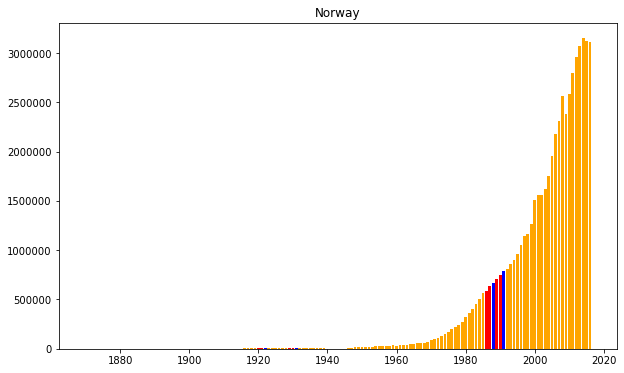

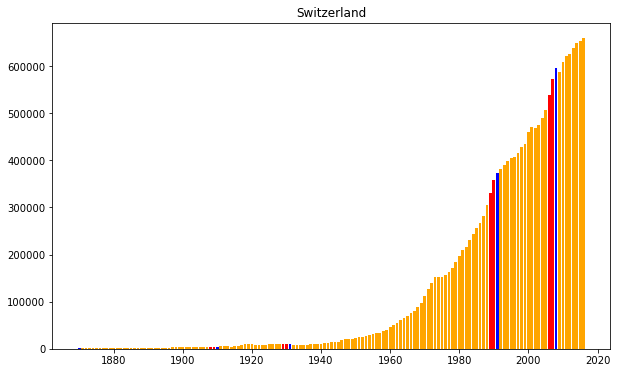

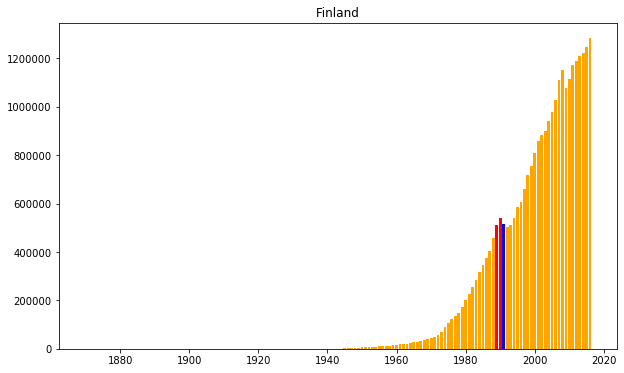

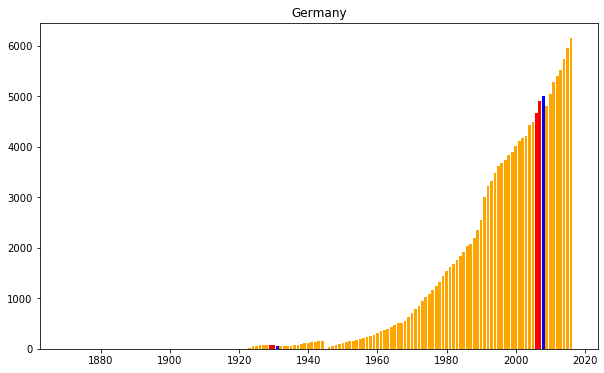

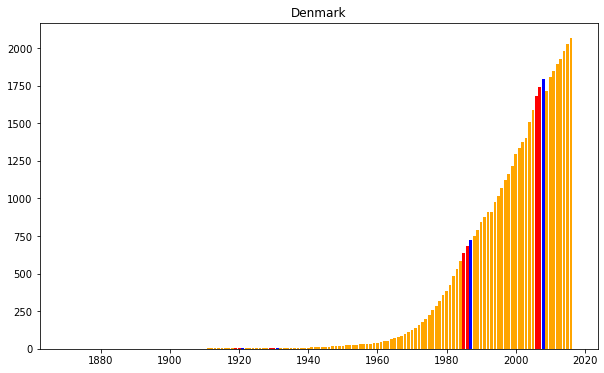

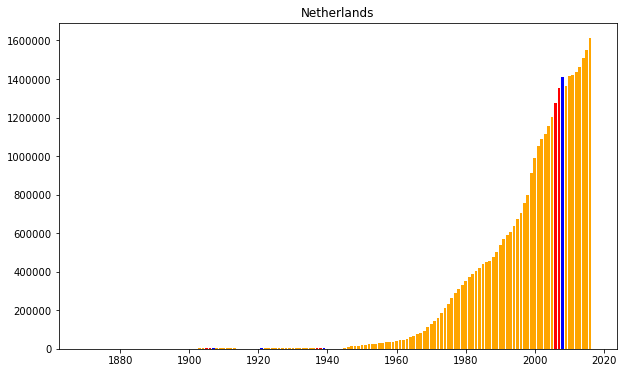

In [17]:
for i in countries:
    vs_feature(i,i.country.unique()[0])

In [18]:
def vs_feature2(df,title):
    
    features = ["log_tloans","log_ltrate","log_money","log_stir","log_debtgdp",
                "log_ca","log_cpi","log_iy","log_capital_tr","log_rconpc","log_rgdpmad","log_rgdppc"]
    
    for i in features:
        vs_country(df,i,i)

### Crecimiento 2

In [19]:
margen = 2

pre_df["gr_tloans"] = pre_df["tloans"].pct_change(periods = margen)
pre_df["gr_ltrate"] = pre_df["ltrate"].pct_change(periods = margen)
pre_df["gr_money"] = pre_df["money"].pct_change(periods = margen)
pre_df["gr_stir"] = pre_df["stir"].pct_change(periods = margen)
pre_df["gr_debtgdp"] = pre_df["debtgdp"].pct_change(periods = margen)
pre_df["gr_ca"] = pre_df["ca"].pct_change(periods = margen)
pre_df["gr_cpi"] = pre_df["cpi"].pct_change(periods = margen)
pre_df["gr_iy"] = pre_df["iy"].pct_change(periods = margen)
pre_df["gr_capital_tr"] = pre_df["capital_tr"].pct_change(periods = margen)
pre_df["gr_rconpc"] = pre_df["rconpc"].pct_change(periods = margen)
pre_df["gr_rgdpmad"] = pre_df["rgdpmad"].pct_change(periods = margen)
pre_df["gr_rgdppc"] = pre_df["rgdppc"].pct_change(periods = margen)

In [20]:
gr_features = ["gr_tloans","gr_ltrate","gr_money","gr_stir","gr_debtgdp",
                "gr_ca","gr_cpi","gr_iy","gr_capital_tr","gr_rconpc","gr_rgdpmad","gr_rgdppc","country","year","crisisJST","precrisis"]

gr_df = pre_df[gr_features]

In [21]:
Norway = gr_df[gr_df["country"] == "Norway"]
Switzerland = gr_df[gr_df["country"] == "Switzerland"]
Finland = gr_df[gr_df["country"] == "Finland"]
Germany = log_df[gr_df["country"] == "Germany"]
Denmark = gr_df[gr_df["country"] == "Denmark"]
Netherlands = gr_df[gr_df["country"] == "Netherlands"]

In [22]:
def vs_feature3(df,title):
    
    features = ["gr_tloans","gr_ltrate","gr_money","gr_stir","gr_debtgdp",
                "gr_ca","gr_cpi","gr_iy","gr_capital_tr","gr_rconpc","gr_rgdpmad","gr_rgdppc"]
    
    for i in features:
        vs_country(df,i,i)

### Crecimiento 4

In [23]:
margen = 4

pre_df["gr_tloans"] = pre_df["tloans"].pct_change(periods = margen)
pre_df["gr_ltrate"] = pre_df["ltrate"].pct_change(periods = margen)
pre_df["gr_money"] = pre_df["money"].pct_change(periods = margen)
pre_df["gr_stir"] = pre_df["stir"].pct_change(periods = margen)
pre_df["gr_debtgdp"] = pre_df["debtgdp"].pct_change(periods = margen)
pre_df["gr_ca"] = pre_df["ca"].pct_change(periods = margen)
pre_df["gr_cpi"] = pre_df["cpi"].pct_change(periods = margen)
pre_df["gr_iy"] = pre_df["iy"].pct_change(periods = margen)
pre_df["gr_capital_tr"] = pre_df["capital_tr"].pct_change(periods = margen)
pre_df["gr_rconpc"] = pre_df["rconpc"].pct_change(periods = margen)
pre_df["gr_rgdpmad"] = pre_df["rgdpmad"].pct_change(periods = margen)
pre_df["gr_rgdppc"] = pre_df["rgdppc"].pct_change(periods = margen)

In [24]:
gr_features = ["gr_tloans","gr_ltrate","gr_money","gr_stir","gr_debtgdp",
                "gr_ca","gr_cpi","gr_iy","gr_capital_tr","gr_rconpc","gr_rgdpmad","gr_rgdppc","country","year","crisisJST","precrisis"]

gr_df = pre_df[gr_features]

In [25]:
Norway = gr_df[gr_df["country"] == "Norway"]
Switzerland = gr_df[gr_df["country"] == "Switzerland"]
Finland = gr_df[gr_df["country"] == "Finland"]
Germany = log_df[gr_df["country"] == "Germany"]
Denmark = gr_df[gr_df["country"] == "Denmark"]
Netherlands = gr_df[gr_df["country"] == "Netherlands"]

### Crecimiento 1

In [26]:
margen = 1

pre_df["gr_tloans"] = pre_df["tloans"].pct_change(periods = margen)
pre_df["gr_ltrate"] = pre_df["ltrate"].pct_change(periods = margen)
pre_df["gr_money"] = pre_df["money"].pct_change(periods = margen)
pre_df["gr_stir"] = pre_df["stir"].pct_change(periods = margen)
pre_df["gr_debtgdp"] = pre_df["debtgdp"].pct_change(periods = margen)
pre_df["gr_ca"] = pre_df["ca"].pct_change(periods = margen)
pre_df["gr_cpi"] = pre_df["cpi"].pct_change(periods = margen)
pre_df["gr_iy"] = pre_df["iy"].pct_change(periods = margen)
pre_df["gr_capital_tr"] = pre_df["capital_tr"].pct_change(periods = margen)
pre_df["gr_rconpc"] = pre_df["rconpc"].pct_change(periods = margen)
pre_df["gr_rgdpmad"] = pre_df["rgdpmad"].pct_change(periods = margen)
pre_df["gr_rgdppc"] = pre_df["rgdppc"].pct_change(periods = margen)

In [27]:
gr_features = ["gr_tloans","gr_ltrate","gr_money","gr_stir","gr_debtgdp",
                "gr_ca","gr_cpi","gr_iy","gr_capital_tr","gr_rconpc","gr_rgdpmad","gr_rgdppc","country","year","crisisJST","precrisis"]

gr_df = pre_df[gr_features]

In [28]:
Norway = gr_df[gr_df["country"] == "Norway"]
Switzerland = gr_df[gr_df["country"] == "Switzerland"]
Finland = gr_df[gr_df["country"] == "Finland"]
Germany = log_df[gr_df["country"] == "Germany"]
Denmark = gr_df[gr_df["country"] == "Denmark"]
Netherlands = gr_df[gr_df["country"] == "Netherlands"]

## Features especiales

In [29]:
pre_df["slope"] = pre_df["ltrate"] - pre_df["stir"]

pre_df["global_credit"] = 0
for i in pre_df.index:
    year_it = pre_df.loc[(i), "year"] 
    pre_df.loc[(i), "global_credit"] = (pre_df[pre_df["year"] == year_it].tloans.sum() - pre_df.loc[(i), "tloans"]) / 5
    
pre_df["gr_global_credit"] = pre_df["global_credit"].pct_change(periods = 2)

In [30]:
pre_df.head()

,ifs,year,country,crisisJST,precrisis,tloans,gdp,ltrate,money,stir,...,gr_ca,gr_cpi,gr_iy,gr_capital_tr,gr_rconpc,gr_rgdpmad,gr_rgdppc,slope,global_credit,gr_global_credit
0,193,1870,Australia,0,0,54.792,208.78,4.911817,54.3,4.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031817,120.663890,NaN
1,193,1871,Australia,0,0,53.748,211.56,4.844633,59.5,4.60,...,-1.855745,-0.015384,-0.042891,NaN,-0.070814,0.007720,0.007279,0.244633,178.555686,NaN
2,193,1872,Australia,0,0,55.822,227.40,4.737350,68.5,4.60,...,0.495528,-0.046875,0.247266,NaN,0.057911,0.077283,0.079457,0.137350,210.108886,0.741274
3,193,1873,Australia,0,0,65.380,266.54,4.671958,73.7,4.40,...,-2.404212,0.000000,-0.041796,NaN,0.102912,0.076040,0.078116,0.271958,242.753809,0.359541
4,193,1874,Australia,0,0,71.478,287.58,4.653317,79.3,4.50,...,-0.496376,0.049180,0.135805,NaN,0.008735,0.002921,0.003008,0.153317,280.604395,0.335519


In [31]:
feat = ["slope","global_credit","gr_global_credit","country","year","crisisJST","precrisis"]

sp_df = pre_df[feat]

In [32]:
Norway = sp_df[sp_df["country"] == "Norway"]
Switzerland = sp_df[sp_df["country"] == "Switzerland"]
Finland = sp_df[sp_df["country"] == "Finland"]
Germany = sp_df[sp_df["country"] == "Germany"]
Denmark = sp_df[sp_df["country"] == "Denmark"]
Netherlands = sp_df[sp_df["country"] == "Netherlands"]

In [33]:
def vs_feature4(df,title):
    
    features = ["slope","global_credit","gr_global_credit"]
    
    for i in features:
        vs_country(df,i,i)

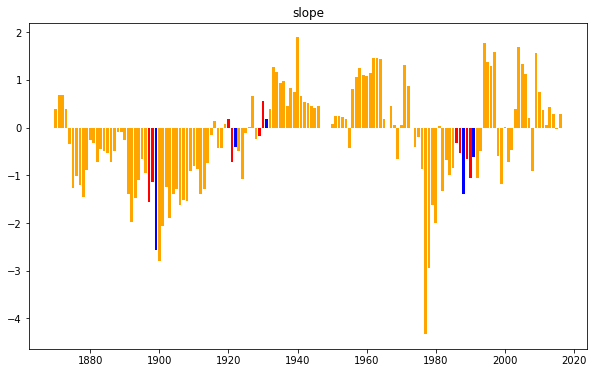

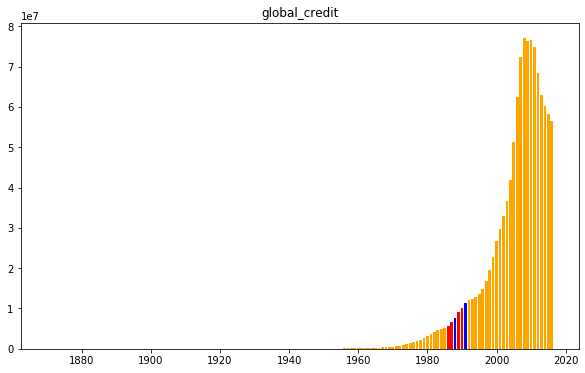

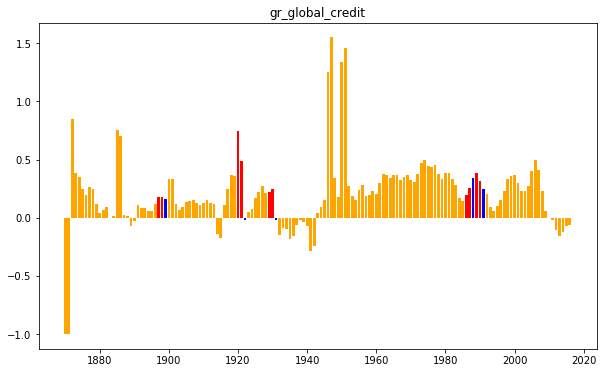

In [34]:
vs_feature4(Norway,"Norway")

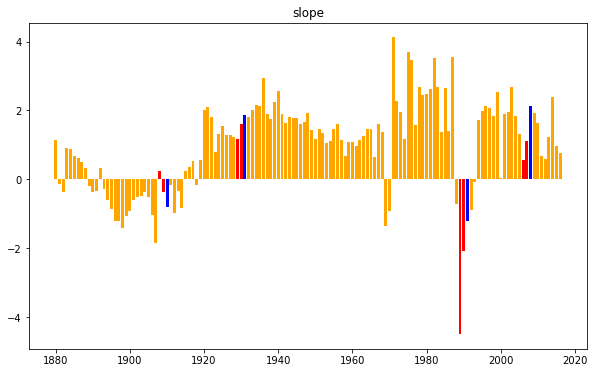

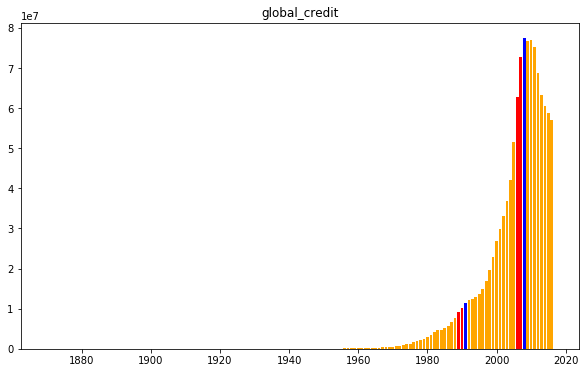

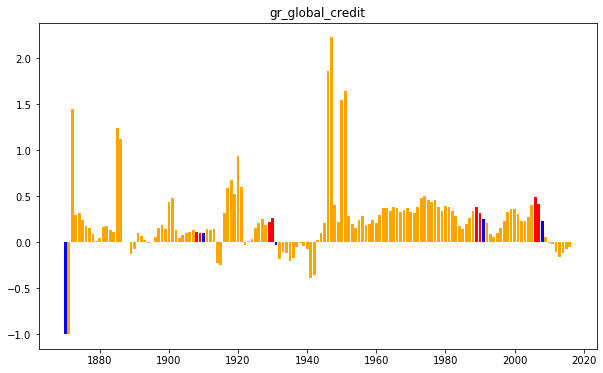

In [35]:
vs_feature4(Switzerland,"Switzerland")

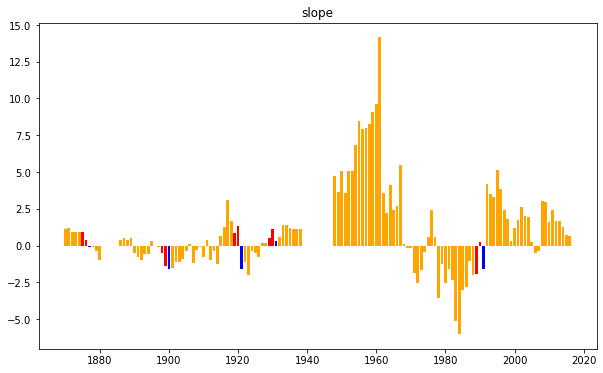

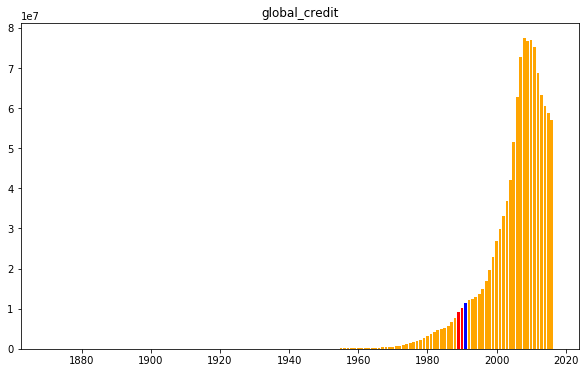

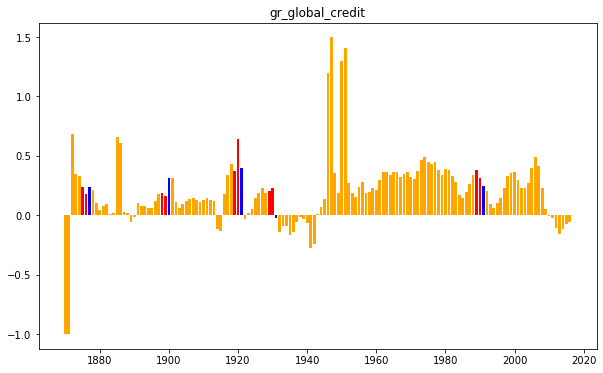

In [36]:
vs_feature4(Finland,"Finland")

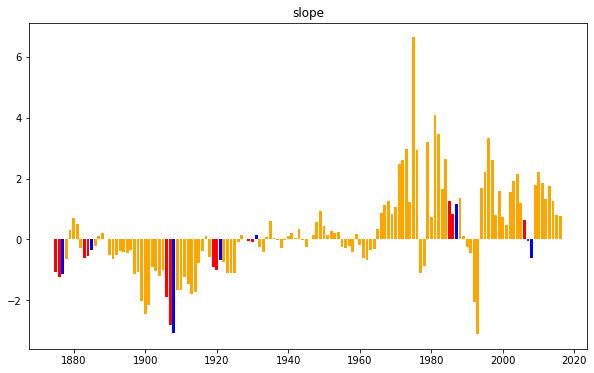

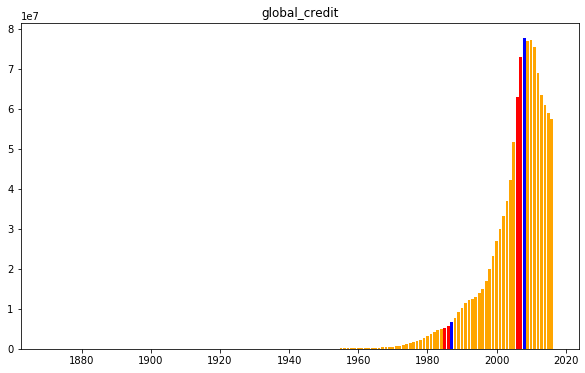

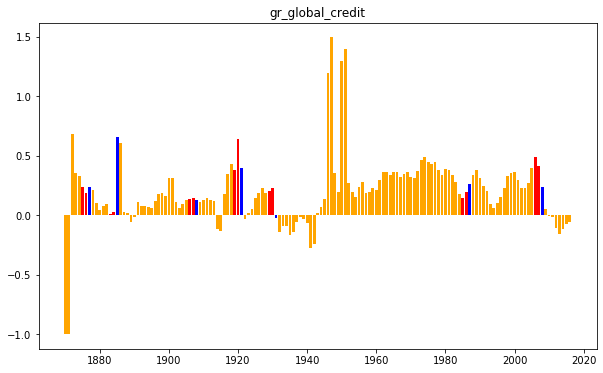

In [37]:
vs_feature4(Denmark,"Denmark") 

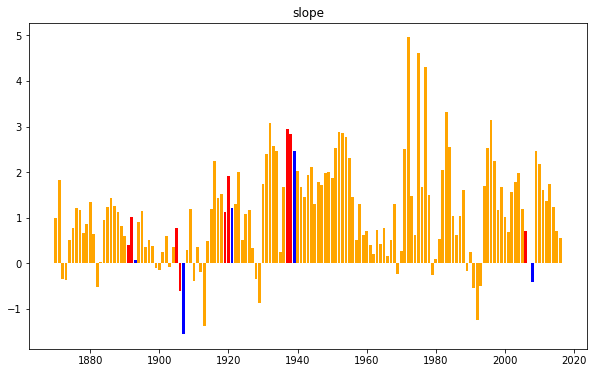

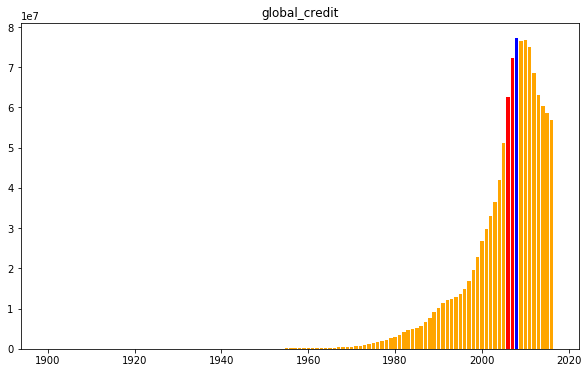

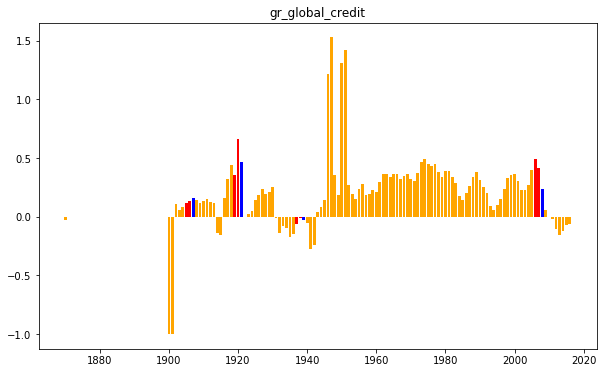

In [38]:
vs_feature4(Netherlands,"Netherlands") 

## Escalado por GDP

In [39]:
pre_df["money_gdp"] = pre_df["money"]/pre_df["gdp"]
pre_df["ca_gdp"] = pre_df["ca"]/pre_df["gdp"]
pre_df["tloans_gdp"] = pre_df["tloans"]/pre_df["gdp"]

In [40]:
feat = ["money_gdp","ca_gdp","tloans_gdp","country","year","crisisJST","precrisis"]
sp_df = pre_df[feat]

def vs_feature4(df,title):
    
    features = ["money_gdp","ca_gdp","tloans_gdp"]
    
    for i in features:
        vs_country(df,i,i)

In [41]:
Norway = sp_df[sp_df["country"] == "Norway"]
Switzerland = sp_df[sp_df["country"] == "Switzerland"]
Finland = sp_df[sp_df["country"] == "Finland"]
Germany = sp_df[sp_df["country"] == "Germany"]
Denmark = sp_df[sp_df["country"] == "Denmark"]
Netherlands = sp_df[sp_df["country"] == "Netherlands"]

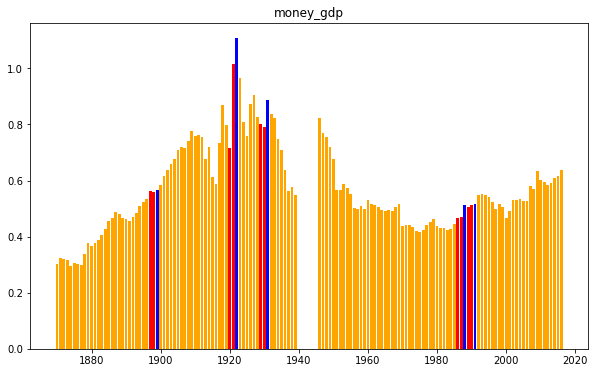

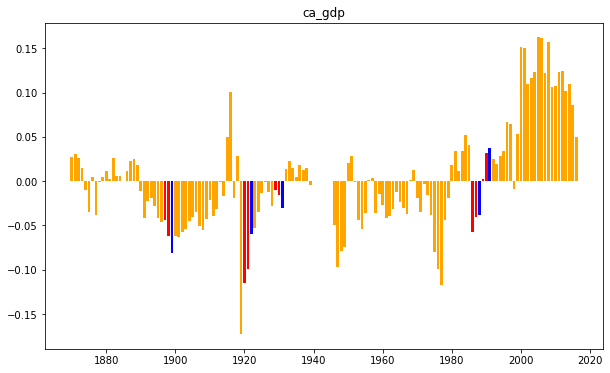

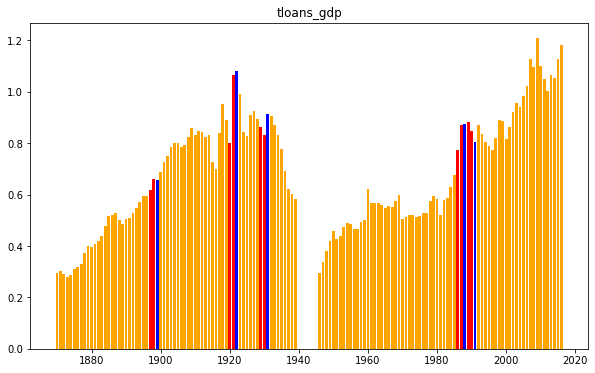

In [42]:
vs_feature4(Norway,"Norway")

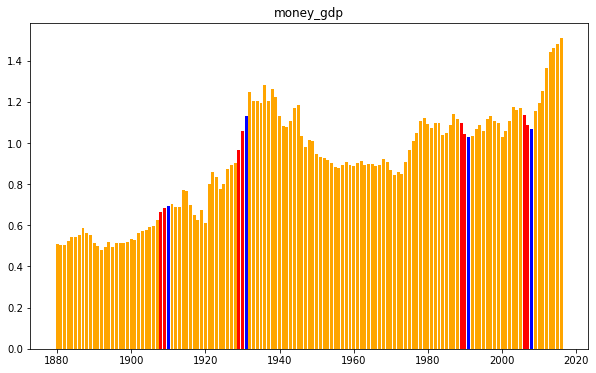

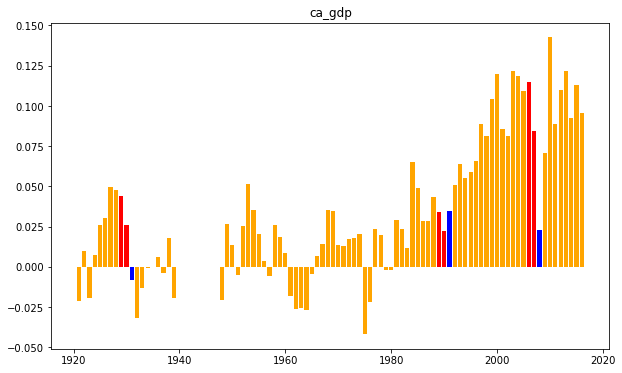

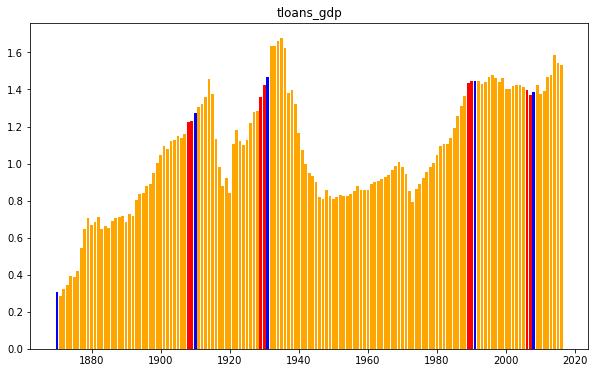

In [43]:
vs_feature4(Switzerland,"Switzerland")

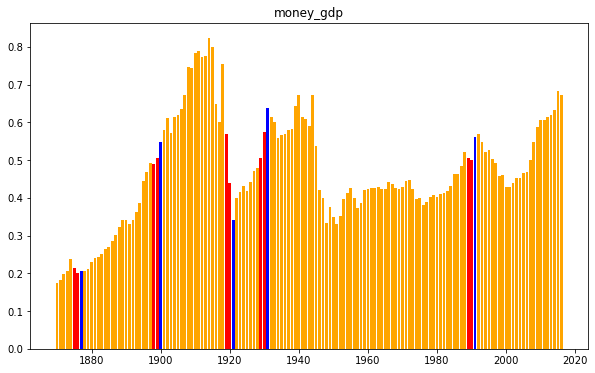

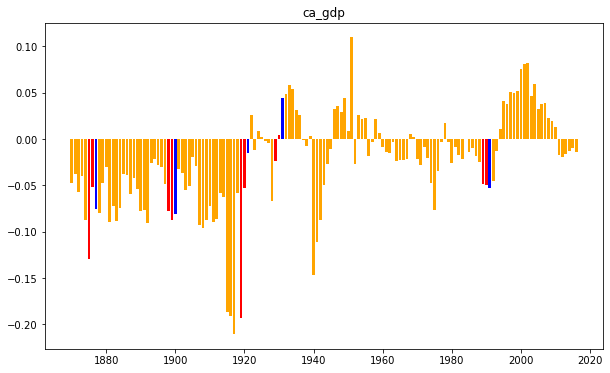

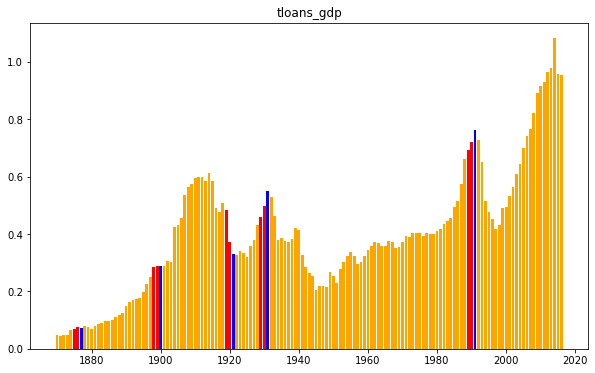

In [44]:
vs_feature4(Finland,"Finland")

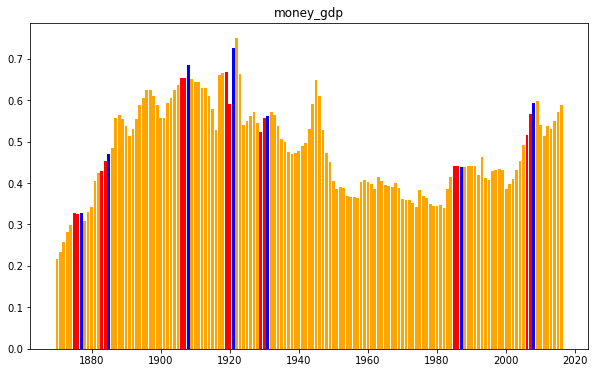

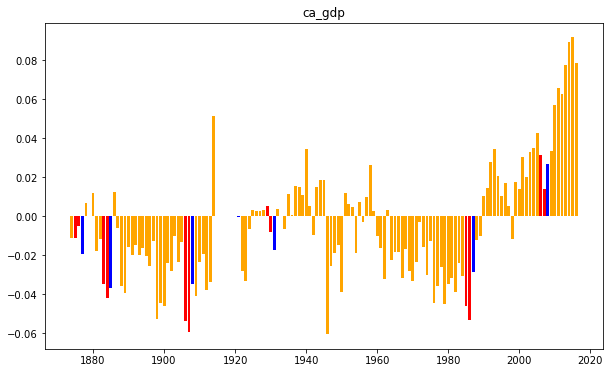

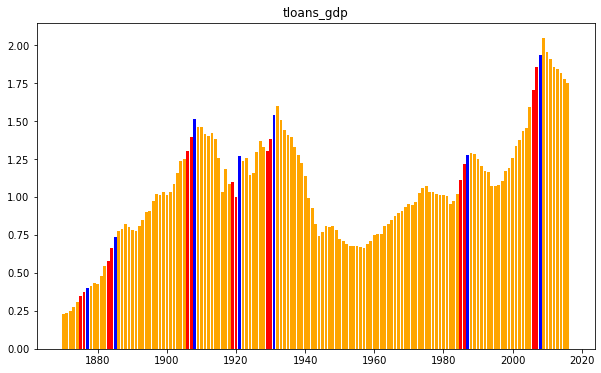

In [45]:
vs_feature4(Denmark,"Denmark") 

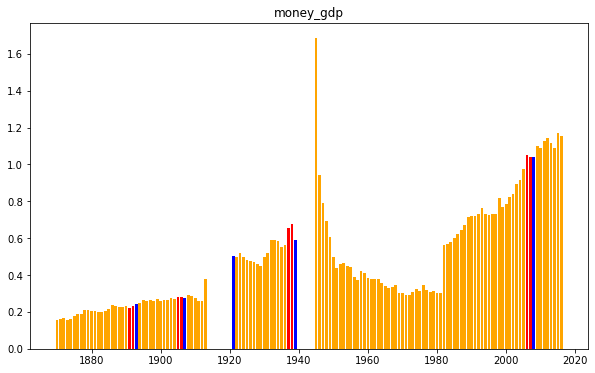

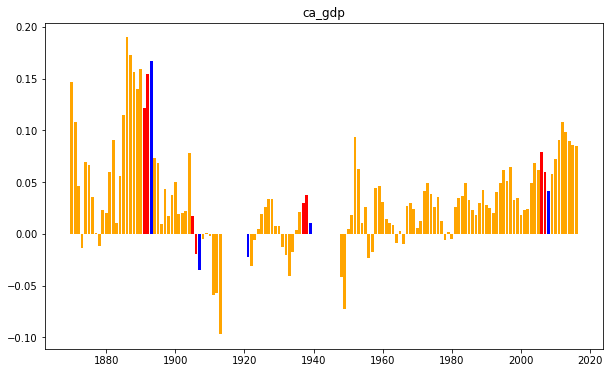

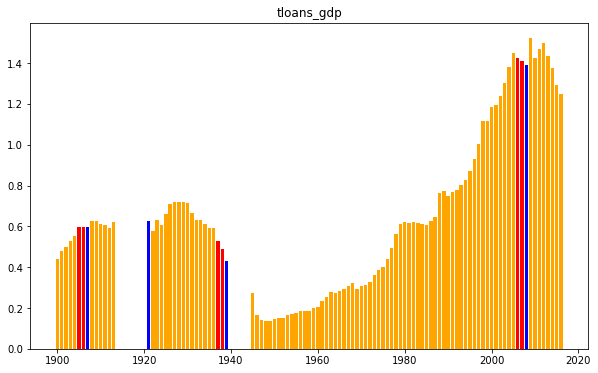

In [46]:
vs_feature4(Netherlands,"Netherlands") 

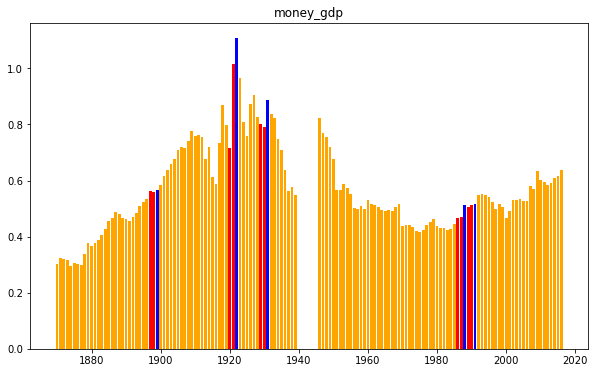

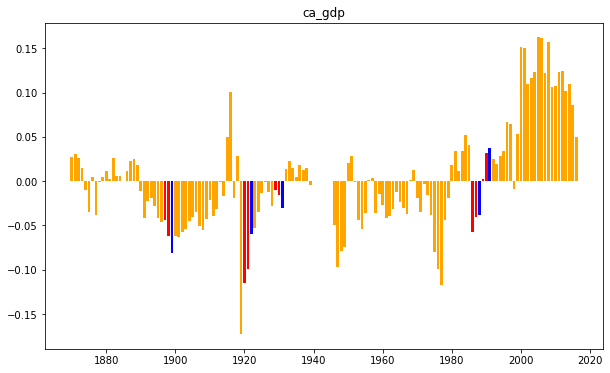

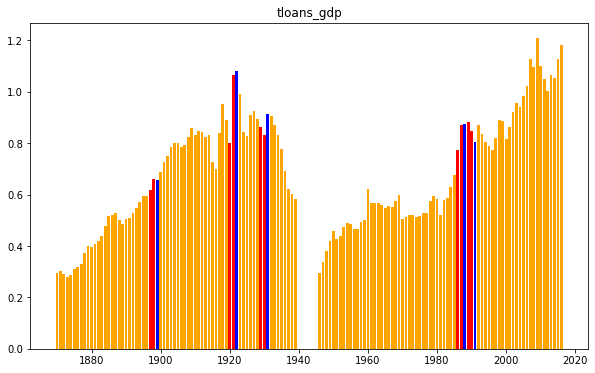

In [47]:
vs_feature4(Norway,"Norway")

# Rolling stuff

In [48]:
Norway = pre_df[pre_df["country"] == "Norway"]
Switzerland = pre_df[pre_df["country"] == "Switzerland"]
Finland = pre_df[pre_df["country"] == "Finland"]
Germany = pre_df[pre_df["country"] == "Germany"]
Denmark = pre_df[pre_df["country"] == "Denmark"]
Netherlands = pre_df[pre_df["country"] == "Netherlands"]

In [49]:
Norway.columns

Index(['ifs', 'year', 'country', 'crisisJST', 'precrisis', 'tloans', 'gdp',
       'ltrate', 'money', 'stir', 'debtgdp', 'ca', 'cpi', 'iy', 'capital_tr',
       'rconpc', 'rgdpmad', 'rgdppc', 'log_tloans', 'log_ltrate', 'log_money',
       'log_stir', 'log_debtgdp', 'log_ca', 'log_cpi', 'log_iy',
       'log_capital_tr', 'log_rconpc', 'log_rgdpmad', 'log_rgdppc',
       'gr_tloans', 'gr_ltrate', 'gr_money', 'gr_stir', 'gr_debtgdp', 'gr_ca',
       'gr_cpi', 'gr_iy', 'gr_capital_tr', 'gr_rconpc', 'gr_rgdpmad',
       'gr_rgdppc', 'slope', 'global_credit', 'gr_global_credit', 'money_gdp',
       'ca_gdp', 'tloans_gdp'],
      dtype='object')

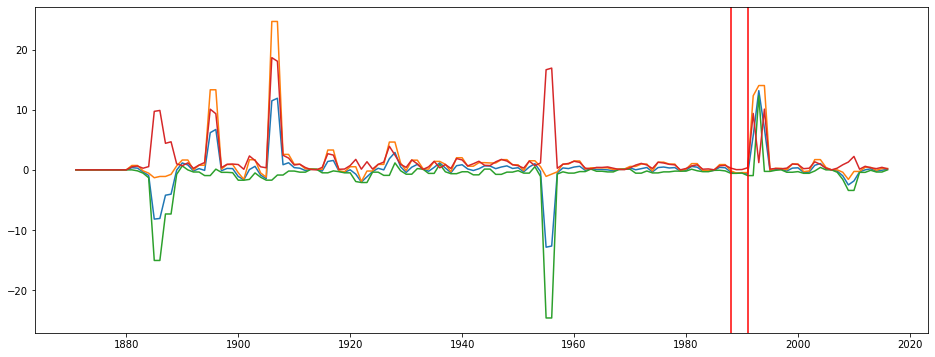

In [50]:
plt.figure(figsize=(16,6))

plt.plot(Norway.year,Norway.gr_capital_tr.rolling(window=2 ,center=False).mean());
plt.plot(Norway.year,Norway.gr_capital_tr.rolling(window=2 ,center=False).max());
plt.plot(Norway.year,Norway.gr_capital_tr.rolling(window=2 ,center=False).min());
plt.plot(Norway.year,Norway.gr_capital_tr.rolling(window=2 ,center=False).std());

plt.axvline(x=1988, color='r')
plt.axvline(x=1991, color='r')

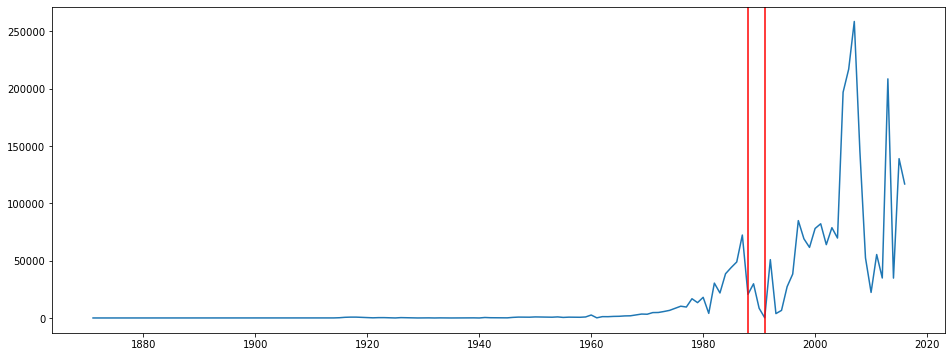

In [51]:
plt.figure(figsize=(16,6))

plt.plot(Norway.year,Norway.tloans.rolling(window=2 ,center=False).std());


plt.axvline(x=1988, color='r')
plt.axvline(x=1991, color='r')

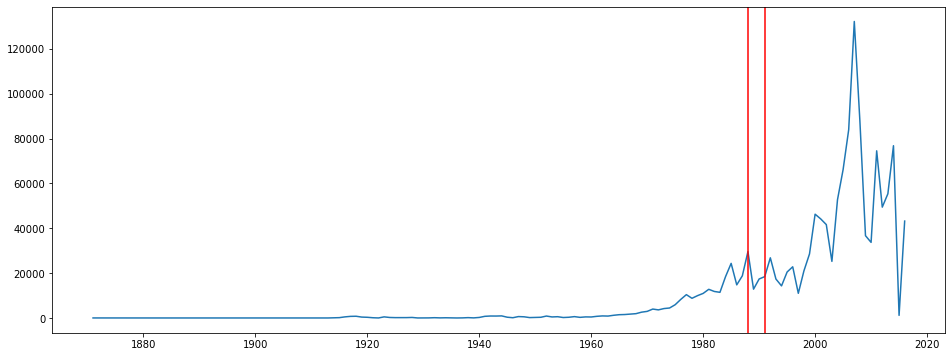

In [52]:
plt.figure(figsize=(16,6))

plt.plot(Norway.year,Norway.money.rolling(window=2 ,center=False).std());


plt.axvline(x=1988, color='r')
plt.axvline(x=1991, color='r')

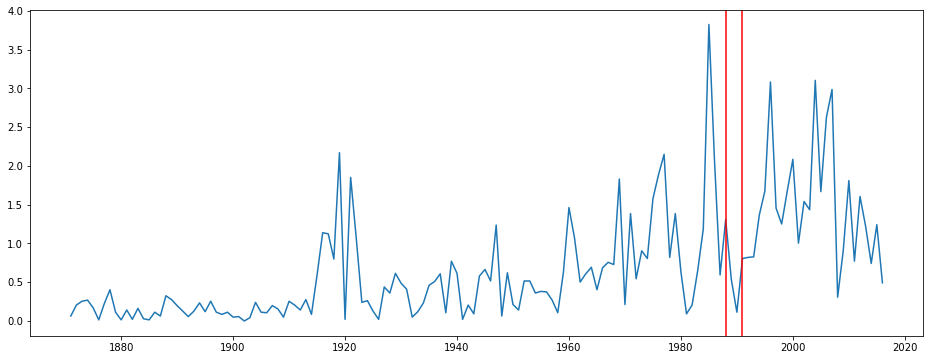

In [53]:
plt.figure(figsize=(16,6))

plt.plot(Norway.year,Norway.rconpc.rolling(window=2 ,center=False).std());


plt.axvline(x=1988, color='r')
plt.axvline(x=1991, color='r')

PRUEBAS

In [54]:
pre_df["rate"] = pre_df["ltrate"]/pre_df["stir"]

In [55]:
feat = ["rate","country","year","crisisJST","precrisis"]
sp_df = pre_df[feat]

def vs_feature4(df,title):
    
    features = ["rate"]
    
    for i in features:
        vs_country(df,i,i)

In [56]:
Norway = pre_df[pre_df["country"] == "Norway"]
Switzerland = pre_df[pre_df["country"] == "Switzerland"]
Finland = pre_df[pre_df["country"] == "Finland"]
Germany = pre_df[pre_df["country"] == "Germany"]
Denmark = pre_df[pre_df["country"] == "Denmark"]
Netherlands = pre_df[pre_df["country"] == "Netherlands"]

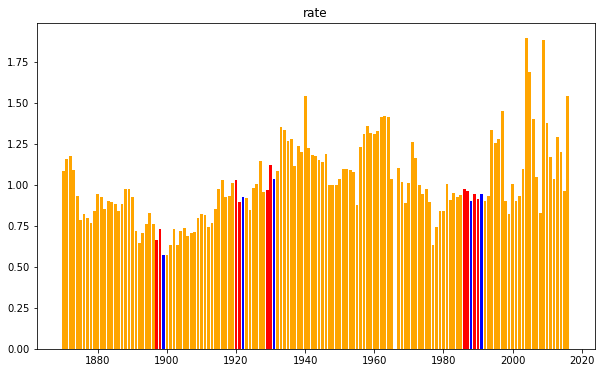

In [57]:
vs_feature4(Norway,"Norway")

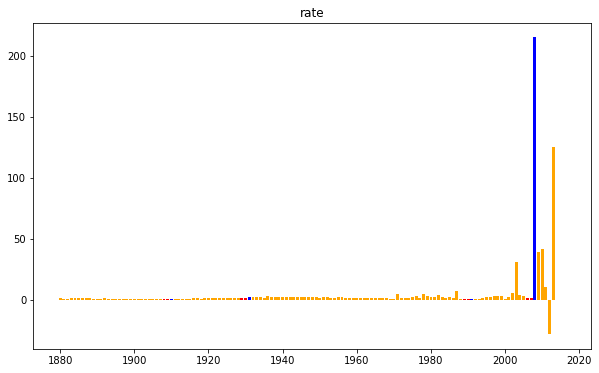

In [58]:
vs_feature4(Switzerland,"Switzerland")

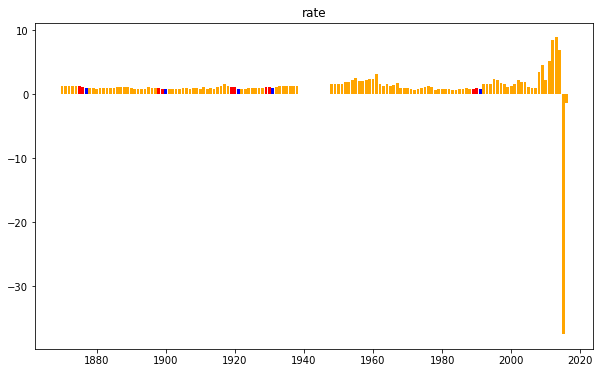

In [59]:
vs_feature4(Finland,"Finland")

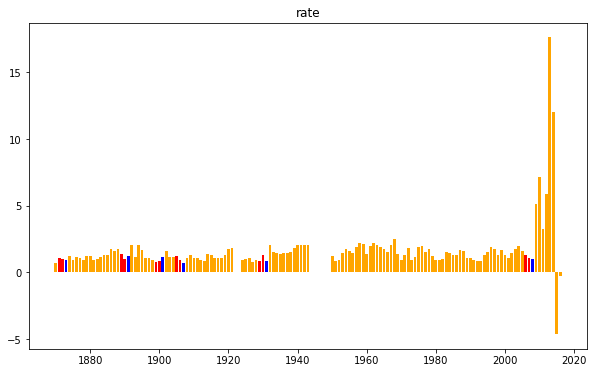

In [60]:
vs_feature4(Germany,"Germany") 

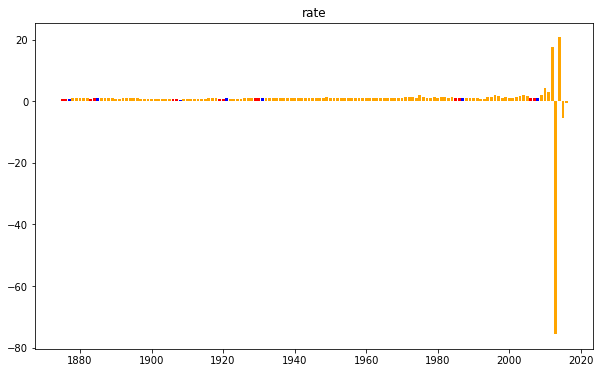

In [61]:
vs_feature4(Denmark,"Denmark") 

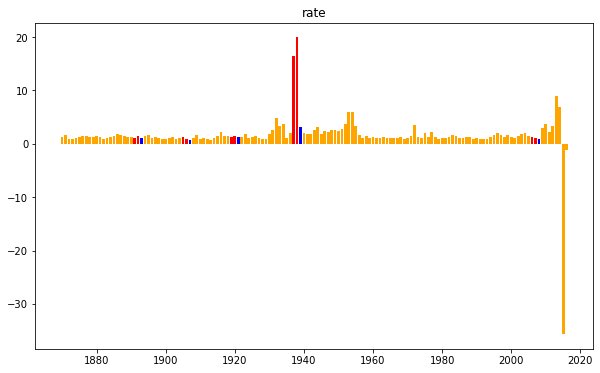

In [62]:
vs_feature4(Netherlands,"Netherlands") 

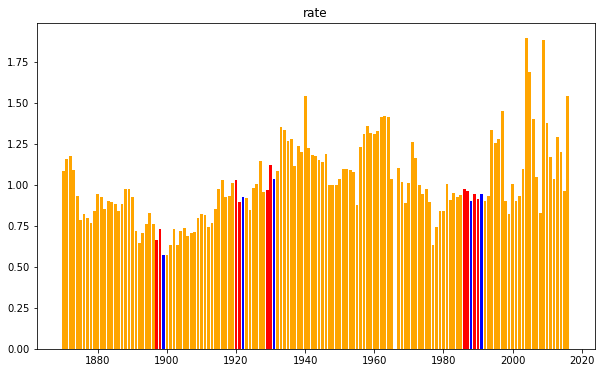

In [63]:
vs_feature4(Norway,"Norway")